<a href="https://colab.research.google.com/github/MaxCastro01/exercises-NeuronalN/blob/main/neurona_conversion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

Exception ignored in: <function _xla_gc_callback at 0x79838d109260>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jax/_src/lib/__init__.py", line 96, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


In [ ]:
celsius = np.array([-40, -10, 0, 8, 15, 22, 38 ], dtype=float)
fahrenheit = np.array ([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [ ]:
#capa = tf.keras.layers.Dense(units=1, input_shape=[1])
#modelo = tf.keras.Sequential([capa])
oculta1 = tf.keras.layers.Dense(units=3, input_shape=[1])
oculta2 = tf.keras.layers.Dense(units=3)
salida = tf.keras.layers.Dense(units=1)
modelo = tf.keras.Sequential([oculta1, oculta2, salida])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [ ]:
print("Comenzar entrenamiento")
historial = modelo.fit(celsius, fahrenheit, epochs = 1000, verbose = False)
print("Fin del entrenamiento")

Comenzar entrenamiento
Fin del entrenamiento


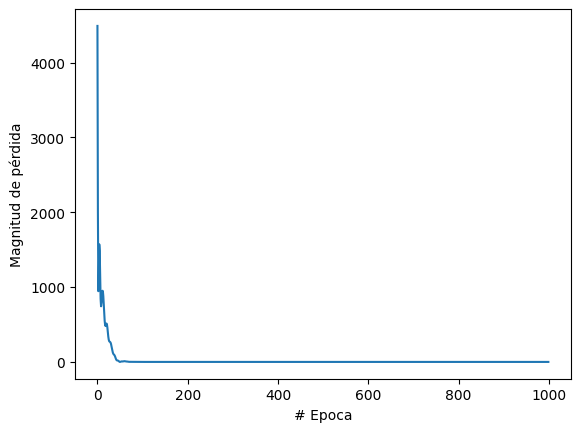

In [ ]:
import matplotlib.pyplot as plt
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

In [ ]:
print("Hagamos una predicción")
resultado = modelo.predict(np.array([23.0]))
print("El resultado es " + str(resultado) + " fahrenheit")

Hagamos una predicción
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
El resultado es [[73.30535]] fahrenheit


In [ ]:
print("Variables internas del modelo")
#print(capa.get_weights())
print(oculta1.get_weights())
print(oculta2.get_weights())
print(salida.get_weights())

Variables internas del modelo
[array([[-0.6484646 ,  0.16565476, -0.09506831]], dtype=float32), array([-4.399143 , -1.6602244, -1.193275 ], dtype=float32)]
[array([[-1.1207824 ,  1.1266202 ,  0.20491974],
       [-1.1398684 , -0.2434854 ,  0.26534793],
       [ 0.37233308,  0.70145804, -0.38790166]], dtype=float32), array([ 4.1995263, -4.0710635,  3.4870794], dtype=float32)]
[array([[ 1.0988492],
       [-1.530959 ],
       [ 0.7035111]], dtype=float32), array([4.0111146], dtype=float32)]
